In [1]:
%load_ext autoreload
%autoreload 2

In [82]:
import wandb
import os

# model_name = "model-tk45el88"
model_name = "model-8pho7ebd"
# model_name = "model-ds441v0c" # nvae model

# if not os.path.isdir(model_name):
api = wandb.Api()
artifact = api.artifact(f"fdlx/sdofm/{model_name}:best", type="model")
path = artifact.download(model_name)

wandb: Downloading large artifact model-8pho7ebd:best, 363.69MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:4.9


In [83]:
path

'model-8pho7ebd'

In [18]:
from sdofm.pretraining import SAMAE, MAE, NVAE
from pathlib import Path
import torch

# model = MAE.load_from_checkpoint(Path(model_name) / "model.ckpt")
# model = MAE.load_from_checkpoint('/home/walsh/SDO-FM/artifacts/model-q1l4qkjj:v4/model.ckpt')#, map_location=torch.device('cpu'))
# ckpt_path = "/home/walsh/SDO-FM/outputs/2024-07-12/10-48-46/sdofm/flp35noh/checkpoints/epoch=1-step=7020.ckpt"

ckpt_path = "/home/walsh/SDO-FM/notebooks/model-8pho7ebd/model.ckpt" # mae bad hp
# ckpt_path = "/home/walsh/SDO-FM/notebooks/model-ds441v0c/model.ckpt"

model = MAE.load_from_checkpoint(ckpt_path, map_location=torch.device("cpu"))

/opt/conda/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.1


In [11]:
# model = MAE.load_from_checkpoint("../mae128-epoch=17-step=139302.ckpt")

/opt/conda/envs/sdofm/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.5, which is newer than your current Lightning version: v2.2.1


In [11]:
import omegaconf
from sdofm.datasets import SDOMLDataModule, HelioProjectedSDOMLDataModule, NonLinearSDOMLDataModule
import os

# cfg = omegaconf.OmegaConf.load("../experiments/pretrain_32.2M_samae_tpu_sweep.yaml")
cfg_path = "../experiments/pretrain_32.2M_samae_HP.yaml"

# cfg_path = "../experiments/pretrain_nvae.yaml"
cfg = omegaconf.OmegaConf.load(cfg_path)

data_module = SDOMLDataModule(
# data_module = NonLinearSDOMLDataModule(
# data_module = HelioProjectedSDOMLDataModule(
    # hmi_path=os.path.join(
    #     cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.hmi
    # ),
    hmi_path=None,
    aia_path=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.aia,
    ),
    # aia_path=None,
    eve_path=None,
    components=cfg.data.sdoml.components,
    wavelengths=cfg.data.sdoml.wavelengths,
    ions=cfg.data.sdoml.ions,
    frequency=cfg.data.sdoml.frequency,
    batch_size=cfg.model.opt.batch_size,
    num_workers=cfg.data.num_workers,
    val_months=cfg.data.month_splits.val,
    test_months=cfg.data.month_splits.test,
    holdout_months=cfg.data.month_splits.holdout,
    cache_dir=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.cache,
    ),
    min_date=cfg.data.min_date,
    max_date=cfg.data.max_date,
    num_frames=cfg.data.num_frames,
    drop_frame_dim=cfg.data.drop_frame_dim,
)
data_module.setup()

[* CACHE SYSTEM *] Found cached index data in /mnt/sdoml/cache/aligndata_AIA_FULL_12min.csv.
[* CACHE SYSTEM *] Found cached normalization data in /mnt/sdoml/cache/normalizations_AIA_FULL_12min.json.
[* CACHE SYSTEM *] Found cached HMI mask data in /mnt/sdoml/cache/hmi_mask_512x512.npy.


In [5]:
import matplotlib.pyplot as plt

In [12]:
data = next(iter(data_module.valid_ds))
data.shape

(9, 1, 512, 512)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        5.000e+00, 7.000e+00, 9.000e+00, 1.100e+01, 5.000e+00, 5.000e+00,
        8.000e+00, 9.000e+00, 6.000e+00, 8.000e+00, 1.500e+01, 2.400e+01,
        2.100e+01, 2.700e+01, 2.300e+01, 3.800e+01, 4.100e+01, 5.200e+01,
        5.900e+01, 7.600e+01, 1.090e+02, 9.400e+01, 1.250e+02, 1.510e+02,
        1.870e+02, 1.810e+02, 2.180e+02, 2.690e+02, 3.230e+02, 3.670e+02,
        4.100e+02, 5.280e+02, 6.170e+02, 7.410e+02, 8.460e+02, 9.690e+02,
        1.113e+03, 1.324e+03, 1.458e+03, 1.650e+03, 1.977e+03, 2.206e+03,
        2.453e+03, 2.720e+03, 3.134e+03, 3.370e+03, 3.775e+03, 3.922e+03,
        4.205e+03, 4.332e+03, 4.621e+03, 4.454e+03, 4.265e+03, 4.096e+03,
        3.746e+03, 3.319e+03, 2.905e+0

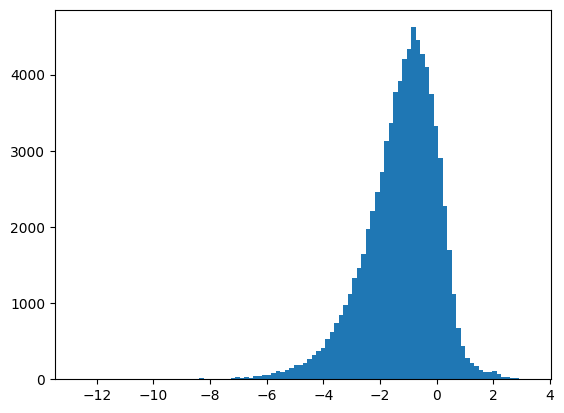

In [10]:
plt.hist(data[0,0,:,:].reshape(-1), bins=100)

(array([1.35102e+05, 2.75830e+04, 3.93160e+04, 2.46410e+04, 1.41000e+04,
        8.21900e+03, 4.90700e+03, 3.02200e+03, 1.76500e+03, 1.02900e+03,
        5.72000e+02, 3.63000e+02, 2.52000e+02, 1.82000e+02, 1.29000e+02,
        1.12000e+02, 7.40000e+01, 7.90000e+01, 6.70000e+01, 5.50000e+01,
        4.90000e+01, 3.10000e+01, 3.60000e+01, 2.60000e+01, 3.60000e+01,
        1.90000e+01, 2.20000e+01, 2.60000e+01, 2.40000e+01, 3.10000e+01,
        2.70000e+01, 2.30000e+01, 1.70000e+01, 1.90000e+01, 2.50000e+01,
        1.10000e+01, 1.10000e+01, 1.70000e+01, 1.10000e+01, 9.00000e+00,
        2.00000e+00, 9.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        6.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00, 9.00000e+00,
        3.00000e+00, 4.00000e+00, 4.00000e+00, 5.00000e+00, 2.00000e+00,
        0.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00,
        3.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00

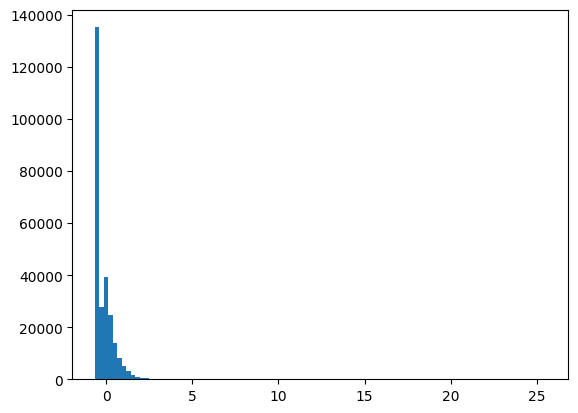

In [13]:
plt.hist(data[0,0,:,:].reshape(-1), bins=100)

In [7]:
data.transpose([1, 0, 2, 3]).shape

(1, 9, 512, 512)

In [5]:
data = next(iter(data_module.valid_ds))
data.shape

(9, 1, 512, 512)

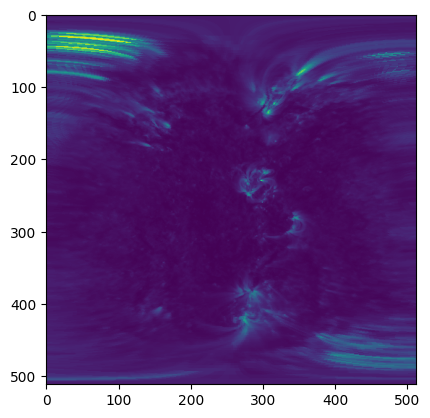

In [11]:
plt.imshow(data[3, 0, :, :])

(array([3.0863e+04, 7.0785e+04, 4.8183e+04, 4.0124e+04, 2.4005e+04,
        1.2789e+04, 8.0680e+03, 5.7980e+03, 3.6300e+03, 3.4870e+03,
        1.8720e+03, 1.6590e+03, 1.5540e+03, 8.3000e+02, 1.2650e+03,
        1.0310e+03, 6.9700e+02, 7.0700e+02, 3.1900e+02, 5.3500e+02,
        3.9700e+02, 3.5000e+02, 2.0900e+02, 1.9400e+02, 2.2200e+02,
        3.7000e+02, 1.7400e+02, 3.4700e+02, 3.6000e+01, 3.6800e+02,
        2.1000e+01, 3.0000e+01, 1.4300e+02, 2.6000e+01, 3.1000e+01,
        7.5000e+01, 8.2000e+01, 7.3000e+01, 2.1200e+02, 6.6000e+01,
        9.2000e+01, 8.1000e+01, 4.0000e+00, 1.0000e+00, 2.3000e+01,
        1.0500e+02, 0.0000e+00, 1.5000e+02, 0.0000e+00, 6.1000e+01]),
 array([-0.71214426, -0.11197036,  0.48820356,  1.08837748,  1.68855131,
         2.28872514,  2.88889909,  3.48907304,  4.08924675,  4.6894207 ,
         5.28959465,  5.8897686 ,  6.48994255,  7.0901165 ,  7.69029045,
         8.2904644 ,  8.89063835,  9.4908123 , 10.09098625, 10.6911602 ,
        11.29133415, 11.89

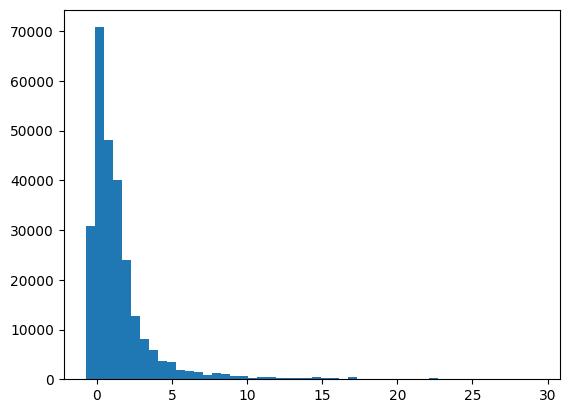

In [23]:
plt.hist(data[3, :, :].reshape(-1), bins=50)

In [19]:
data[3, :, :].min()

-0.71214426

In [8]:
data.shape

(9, 1, 512, 512)

In [15]:
import torch

In [12]:
data.shape

(9, 5, 512, 512)

In [85]:
loss, x_hat, mask = model(torch.Tensor([data]))

In [89]:
data.shape

(9, 1, 512, 512)

In [19]:
x = torch.tensor([data])

In [20]:
x2 = model.autoencoder.patch_embed(x) + model.autoencoder.pos_embed[:,1:,:]

In [21]:
x2.shape

torch.Size([1, 1024, 128])

In [24]:
x_masked, mask, ids_restore = model.autoencoder.random_masking(x2, mask_ratio=0.75)

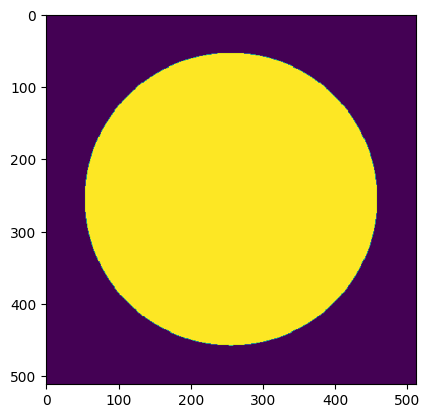

In [25]:
plt.imshow(data_module.hmi_mask)

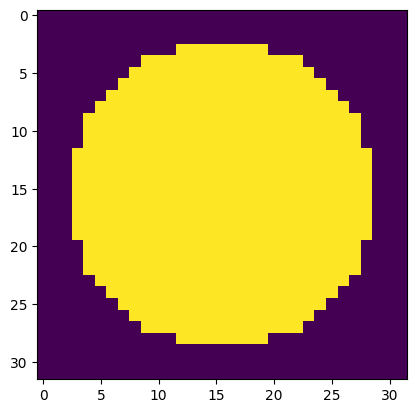

In [27]:
from skimage.measure import block_reduce
import numpy as np 
new_matrix=block_reduce(data_module.hmi_mask.numpy(), block_size=(16,16), func=np.max)
plt.imshow(new_matrix)

In [ ]:
ids_limb_mask = torch.tensor(np.argwhere(new_matrix.reshape(1024)==0).reshape(-1))

In [58]:
ids_limb_mask

[autoreload of sdofm.models.mae3d failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/walsh/SDO-FM/sdofm/models/mae3d.py", line 102
    self.ids_limb_mask = 
                         ^
SyntaxError: invalid syntax
]


tensor([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
          24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
          36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
          48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,   59,
          60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
          96,   97,   98,   99,  100,  101,  102,  103,  104,  105,  106,  107,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,
         128,  129,  130,  131,  132,  133,  134,  135,  136,  151,  152,  153,
         154,  155,  156,  157,  158,  159,  160,  161,  162,  163,  164,  165,
         166,  167,  184,  185,  186,  1

In [28]:
x2.shape

torch.Size([1, 1024, 128])

In [29]:
N,L,D = x2.shape
mask_ratio = 0.75
len_keep = int(L * (1 - mask_ratio))

noise = torch.rand(N, L, device=x.device)  
# sort noise for each sample
ids_shuffle = torch.argsort(
    noise, dim=1
)  # ascend: small is keep, large is remove
ids_restore = torch.argsort(ids_shuffle, dim=1)

# keep the first subset
ids_keep = ids_shuffle[:, :len_keep]

# if using a solar limb mask, we're not interested in predicting outside the
# disk. For that we override these kept ids to include always keeping the mask
# as we don't want to learn that.
# ids_keep = np.append(ids_keep, ids_limb_mask).unique()

In [31]:
ids_keep.shape

torch.Size([1, 256])

In [52]:
ids = torch.tensor(torch.unique(torch.cat((ids_keep[0], ids_limb_mask))))

/var/tmp/ipykernel_154611/1773218616.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ids = torch.tensor(torch.unique(torch.cat((ids_keep[0], ids_limb_mask))))


In [57]:
len(ids)

624

In [48]:
ids.shape

torch.Size([624])

In [42]:
ids.shape

torch.Size([624])

In [36]:
ids.shape

(624,)

In [175]:
# make sure this works as tensor, move the ids_limb_mask to init
# update the len_keep

ValueError: cannot reshape array of size 612 into shape (32,32)

In [33]:
# new_matrix.reshape(1024).nonzero()


In [141]:
mask.max()

tensor(1.)

In [145]:
mask.index

AttributeError: 'Tensor' object has no attribute 'index'

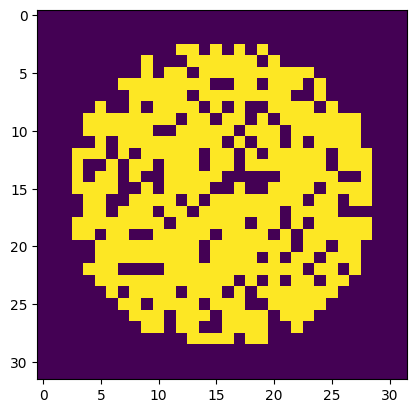

In [144]:
plt.imshow(np.fmax((mask + new_matrix.reshape(32**2)).reshape(32,32), 1))

In [124]:
ids_restore

tensor([[421, 936, 478,  ..., 139, 975, 303]])

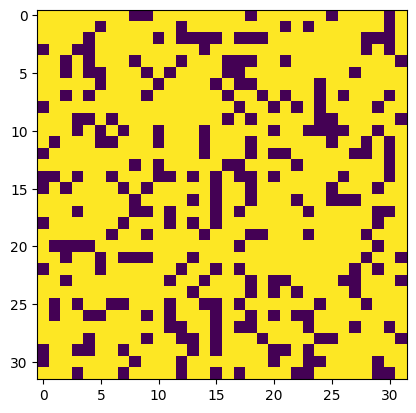

In [80]:
plt.imshow(mask.reshape(32, 32))

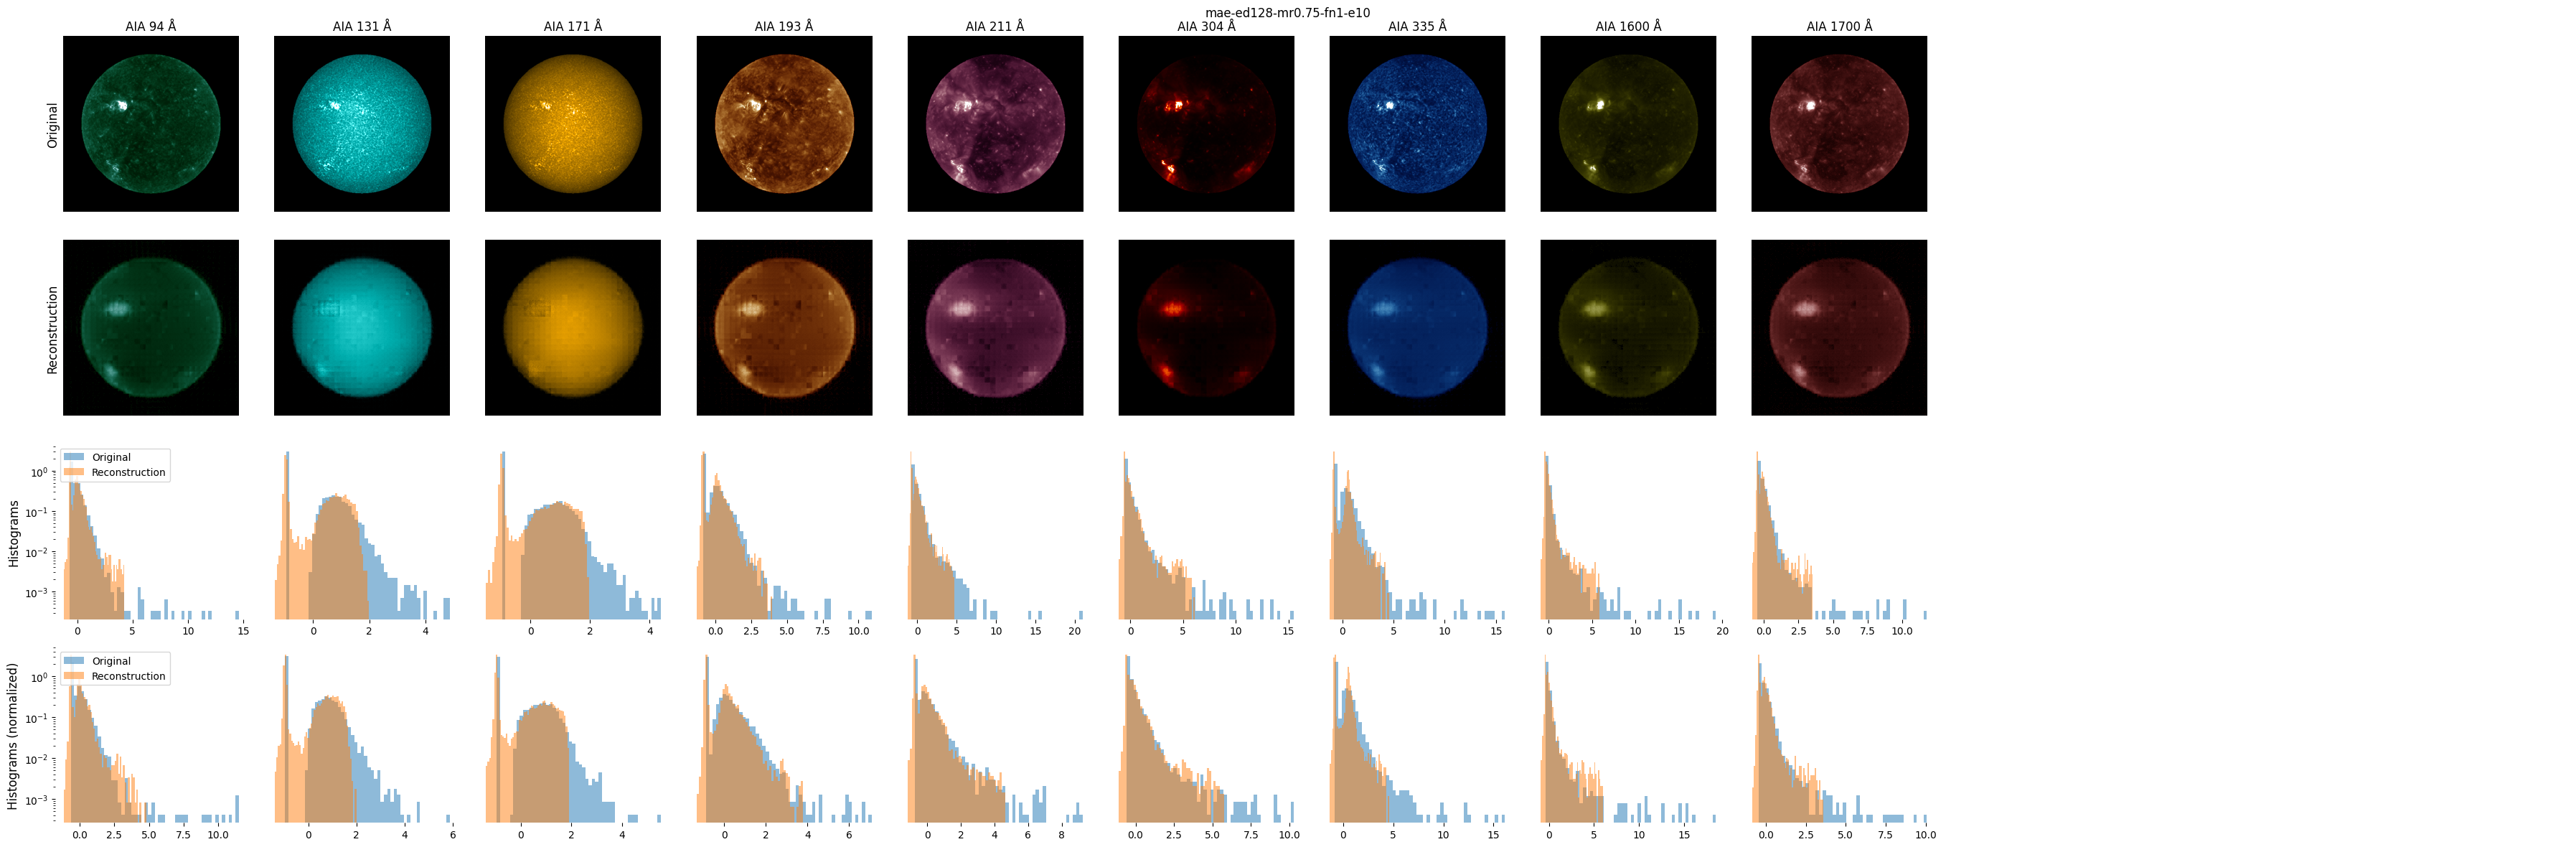

In [81]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]),
    x_hat[0, :, 0, :, :],
    title="mae-ed128-mr0.75-fn1-e10",
)

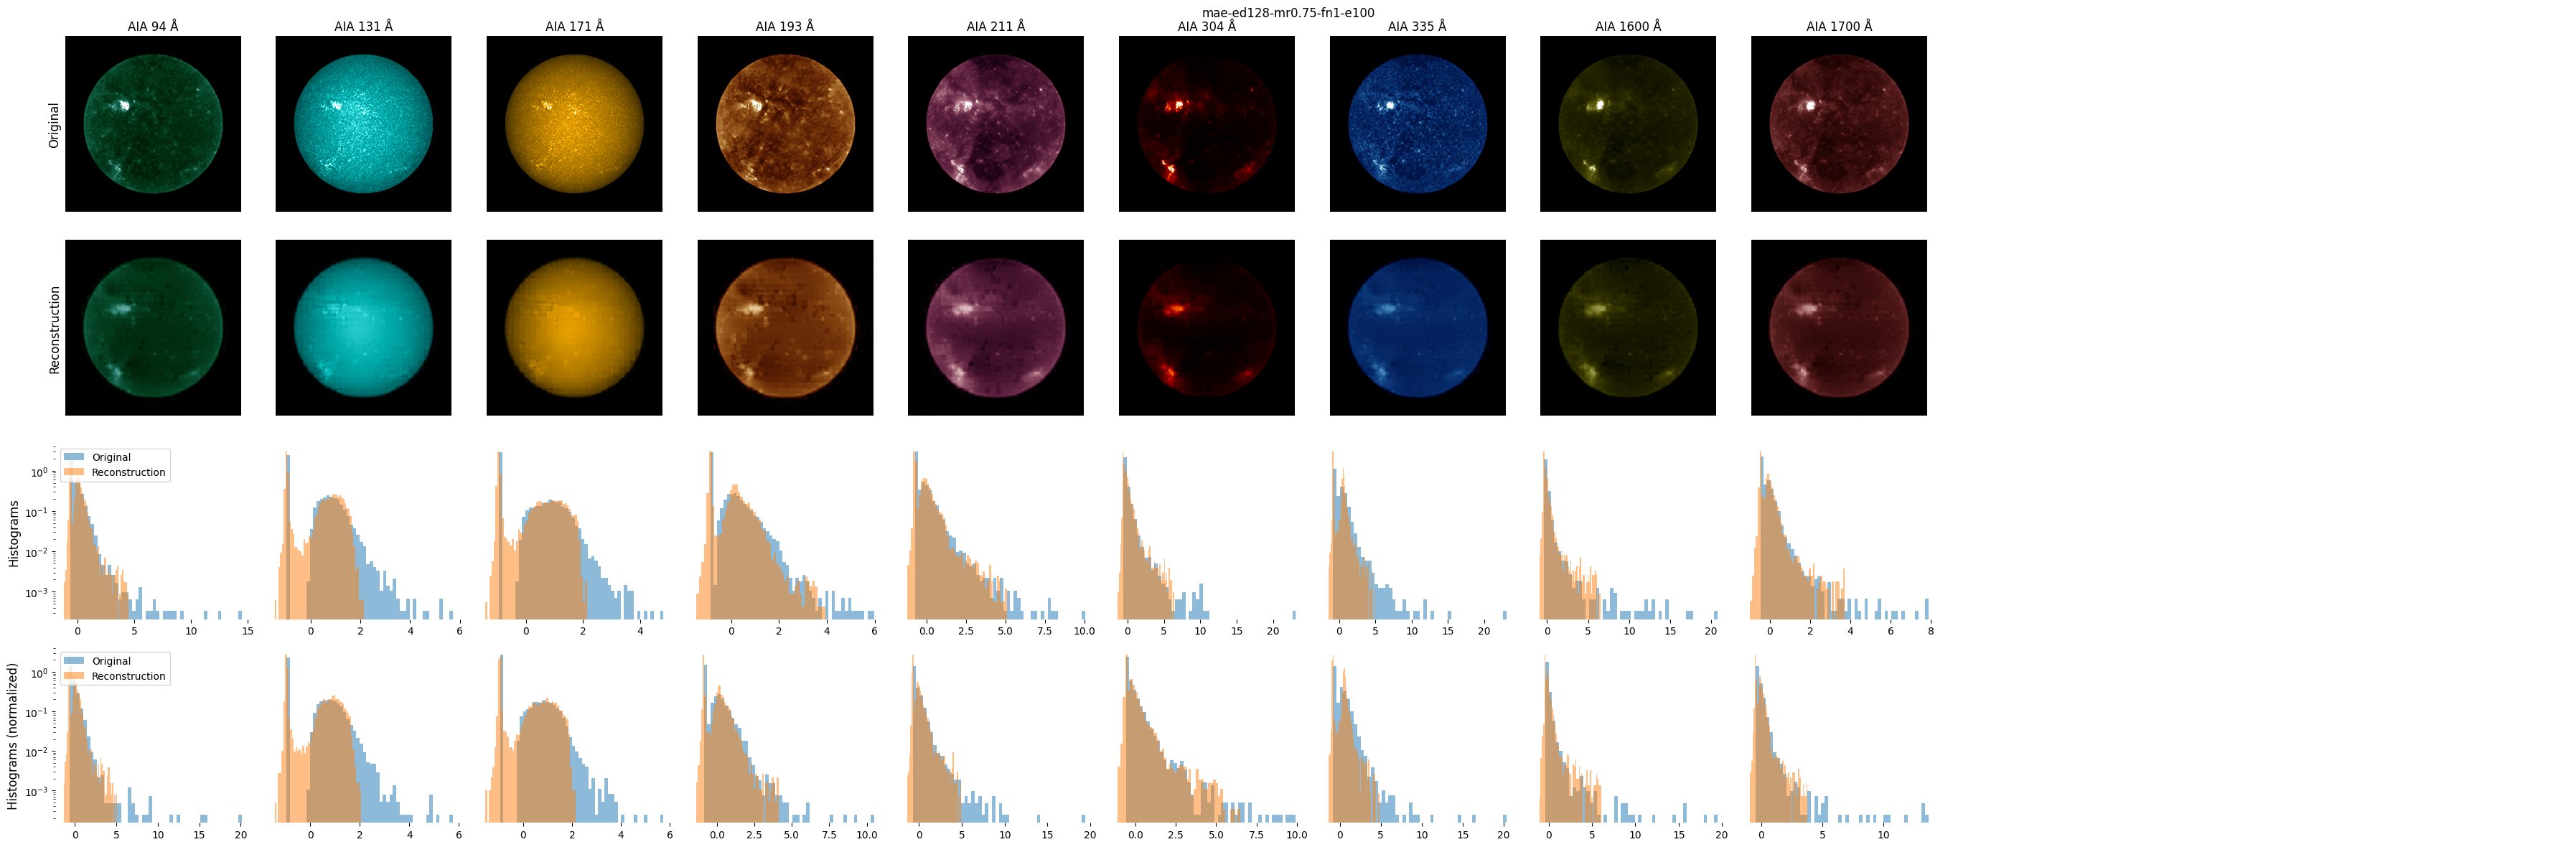

In [86]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]),
    x_hat[0, :, 0, :, :],
    title="mae-ed128-mr0.75-fn1-e100",
)

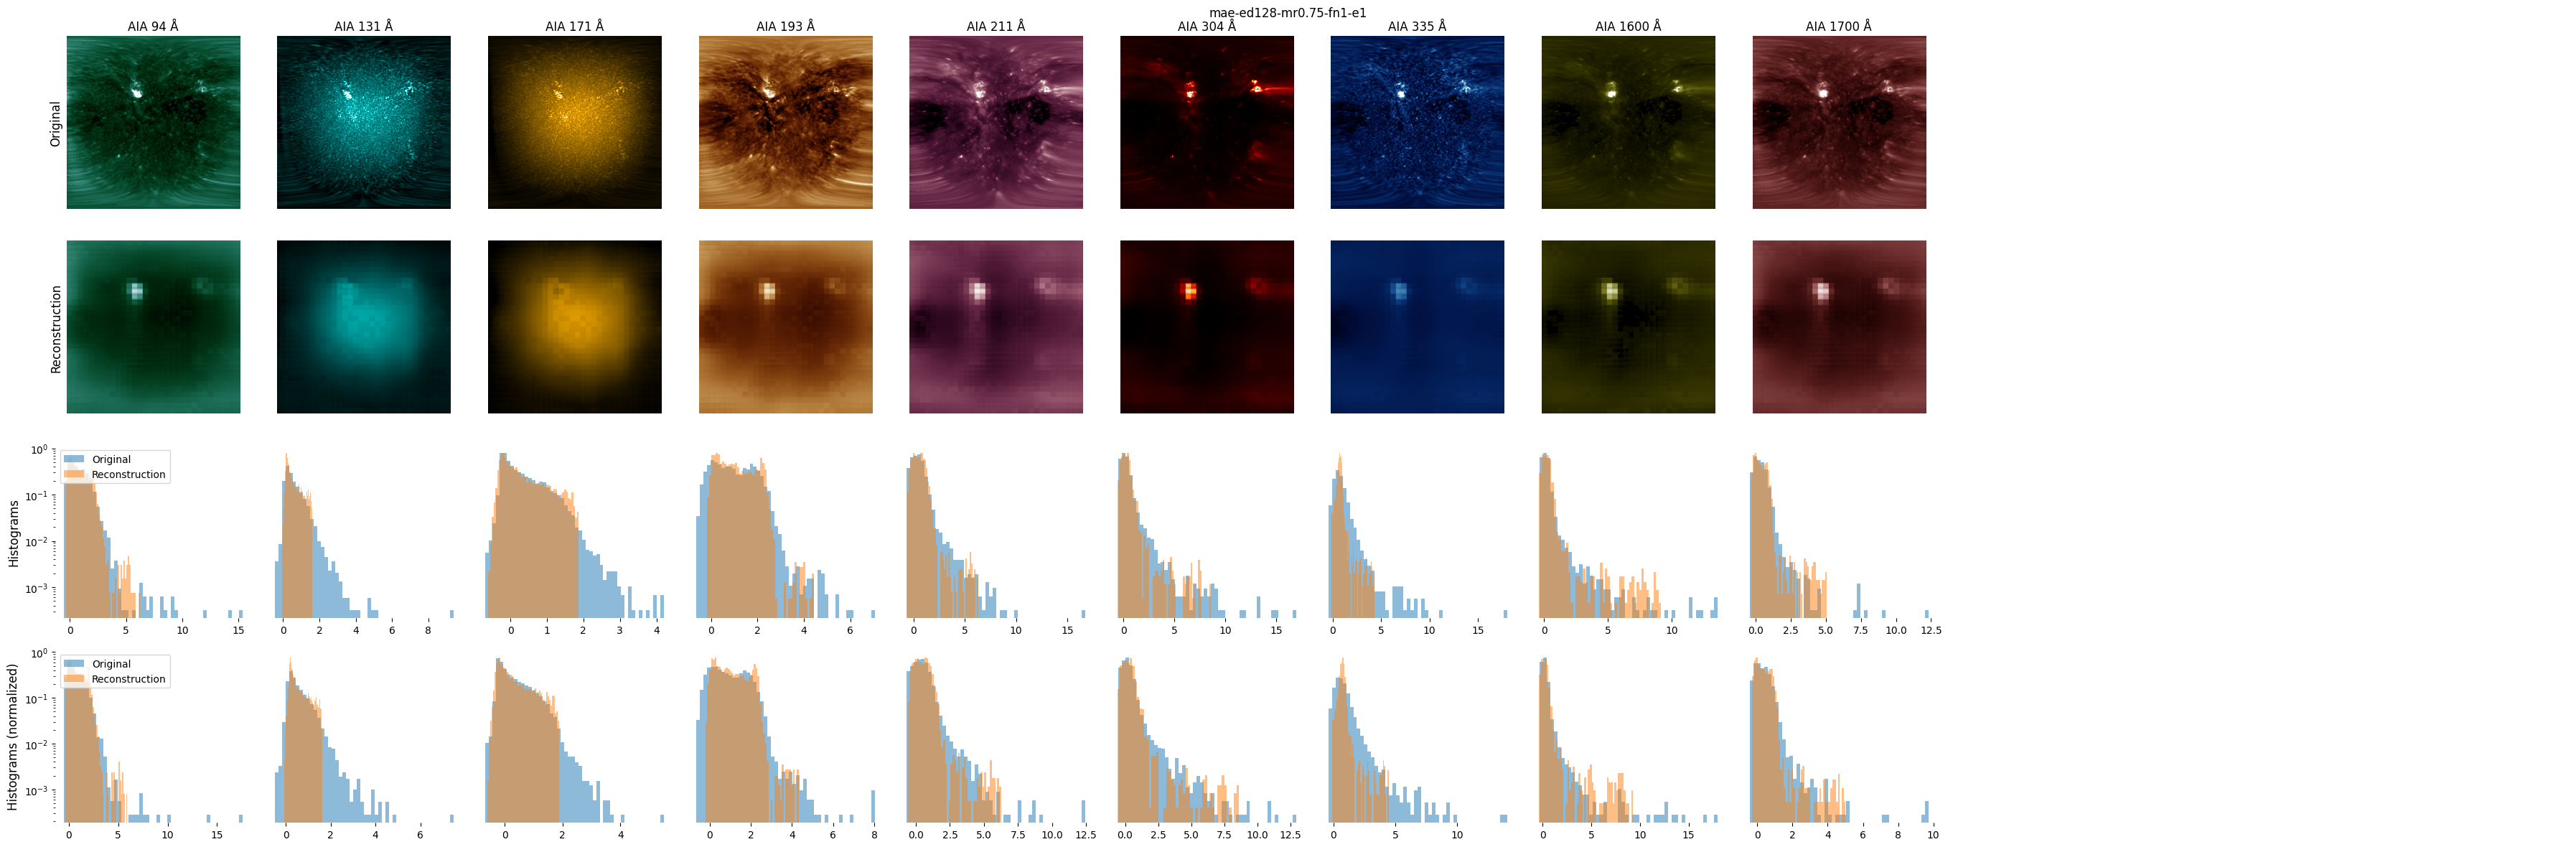

In [20]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]),
    x_hat[0, :, 0, :, :],
    title="mae-ed128-mr0.75-fn1-e1",
)

/var/tmp/ipykernel_2794232/2671953727.py:4: RuntimeWarning: invalid value encountered in log
  torch.Tensor(np.log(data[:, 0, :, :])),


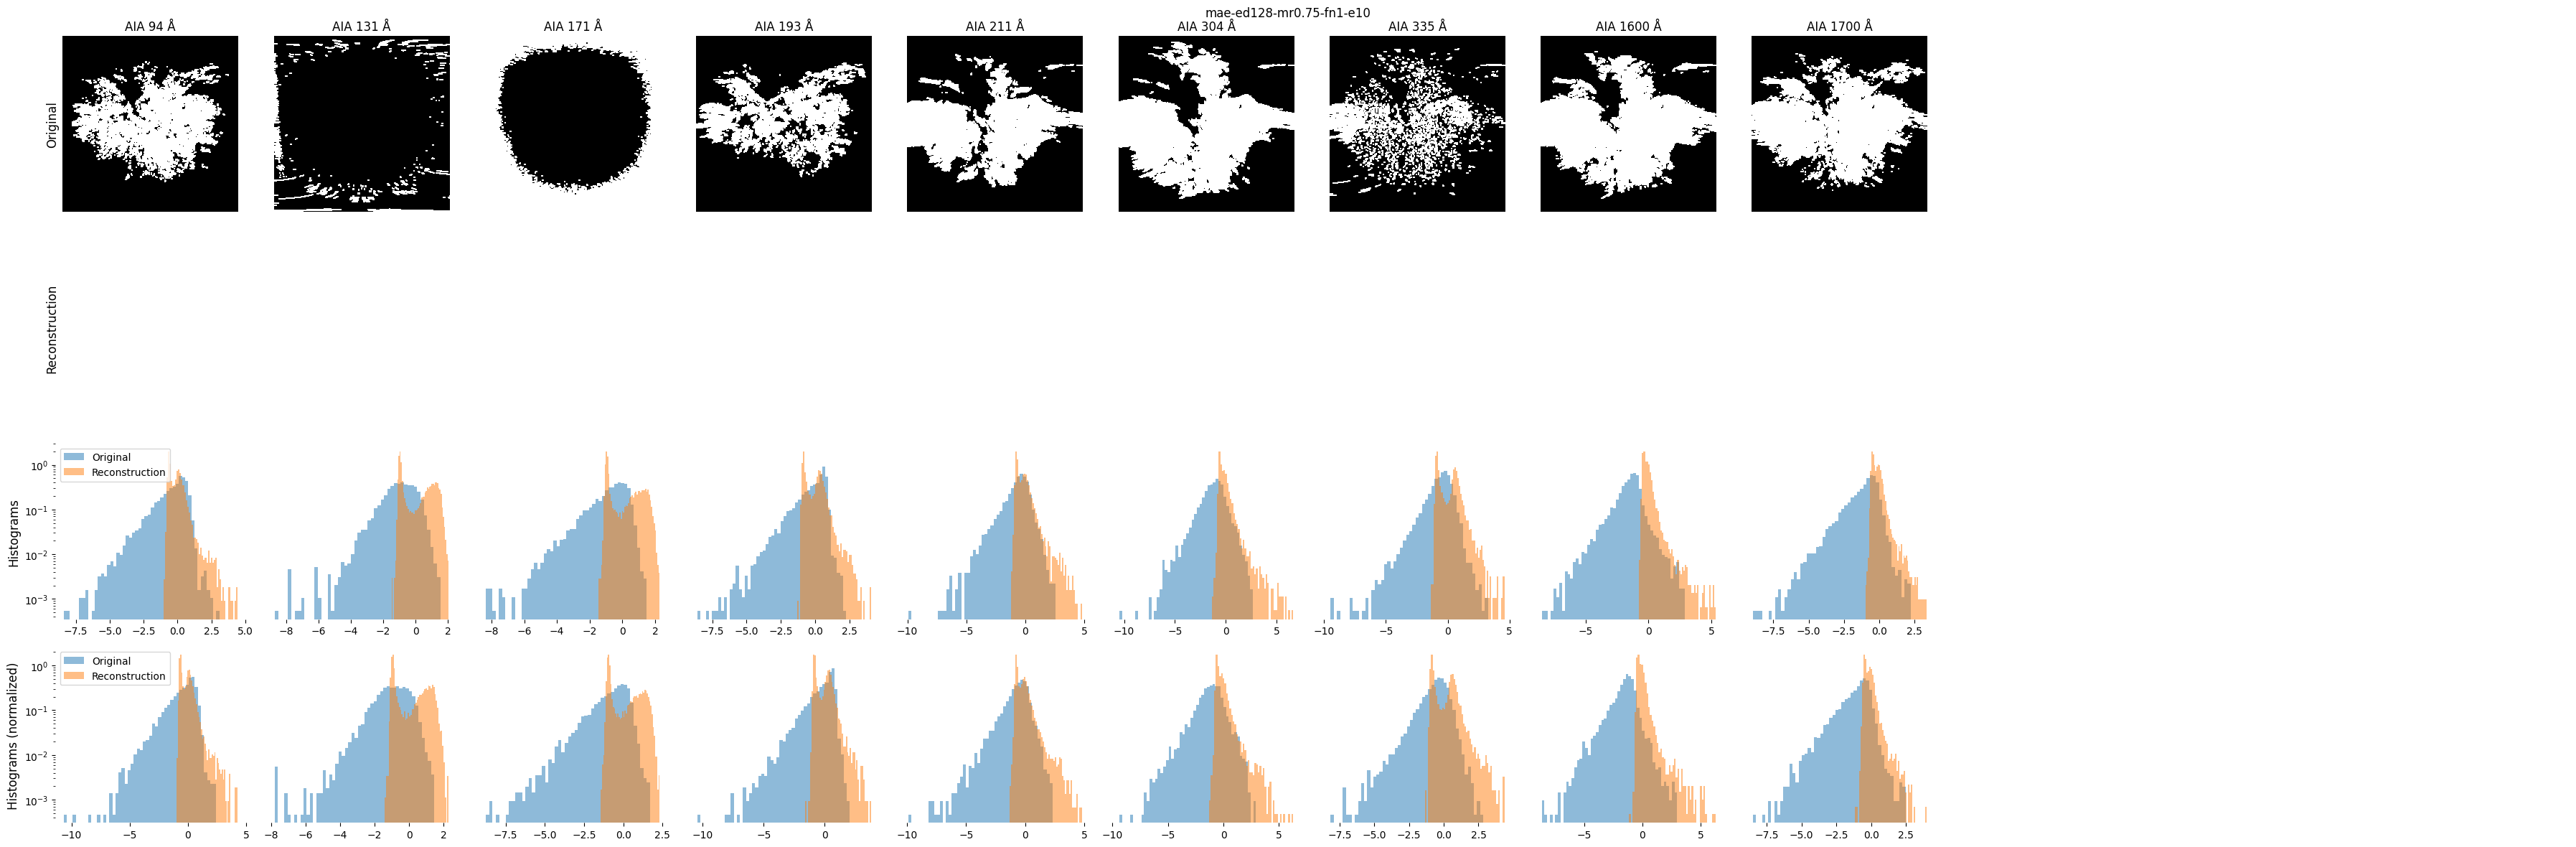

In [18]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot
import numpy as np
sdo_reconstruction_plot(
    torch.Tensor(np.log(data[:, 0, :, :])),
    x_hat[0, :, 0, :, :],
    title="mae-ed128-mr0.75-fn1-e10",
)

NVAE

In [37]:
data = next(iter(data_module.valid_ds))
data.shape

(12, 512, 512)

In [45]:
data = torch.tensor(data).reshape((1, 12, 512, 512))

In [48]:
# model()

logits, log_q, log_p, kl_all, kl_diag = model.autoencoder(torch.tensor(data))
output = model.autoencoder.decoder_output(logits)
x = output.sample()
# x = torch.tensor(data)
# latents, mask, ids = model.encode(x)

/var/tmp/ipykernel_2794232/1702646834.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logits, log_q, log_p, kl_all, kl_diag = model.autoencoder(torch.tensor(data))


In [51]:
x.shape

torch.Size([1, 12, 512, 512])

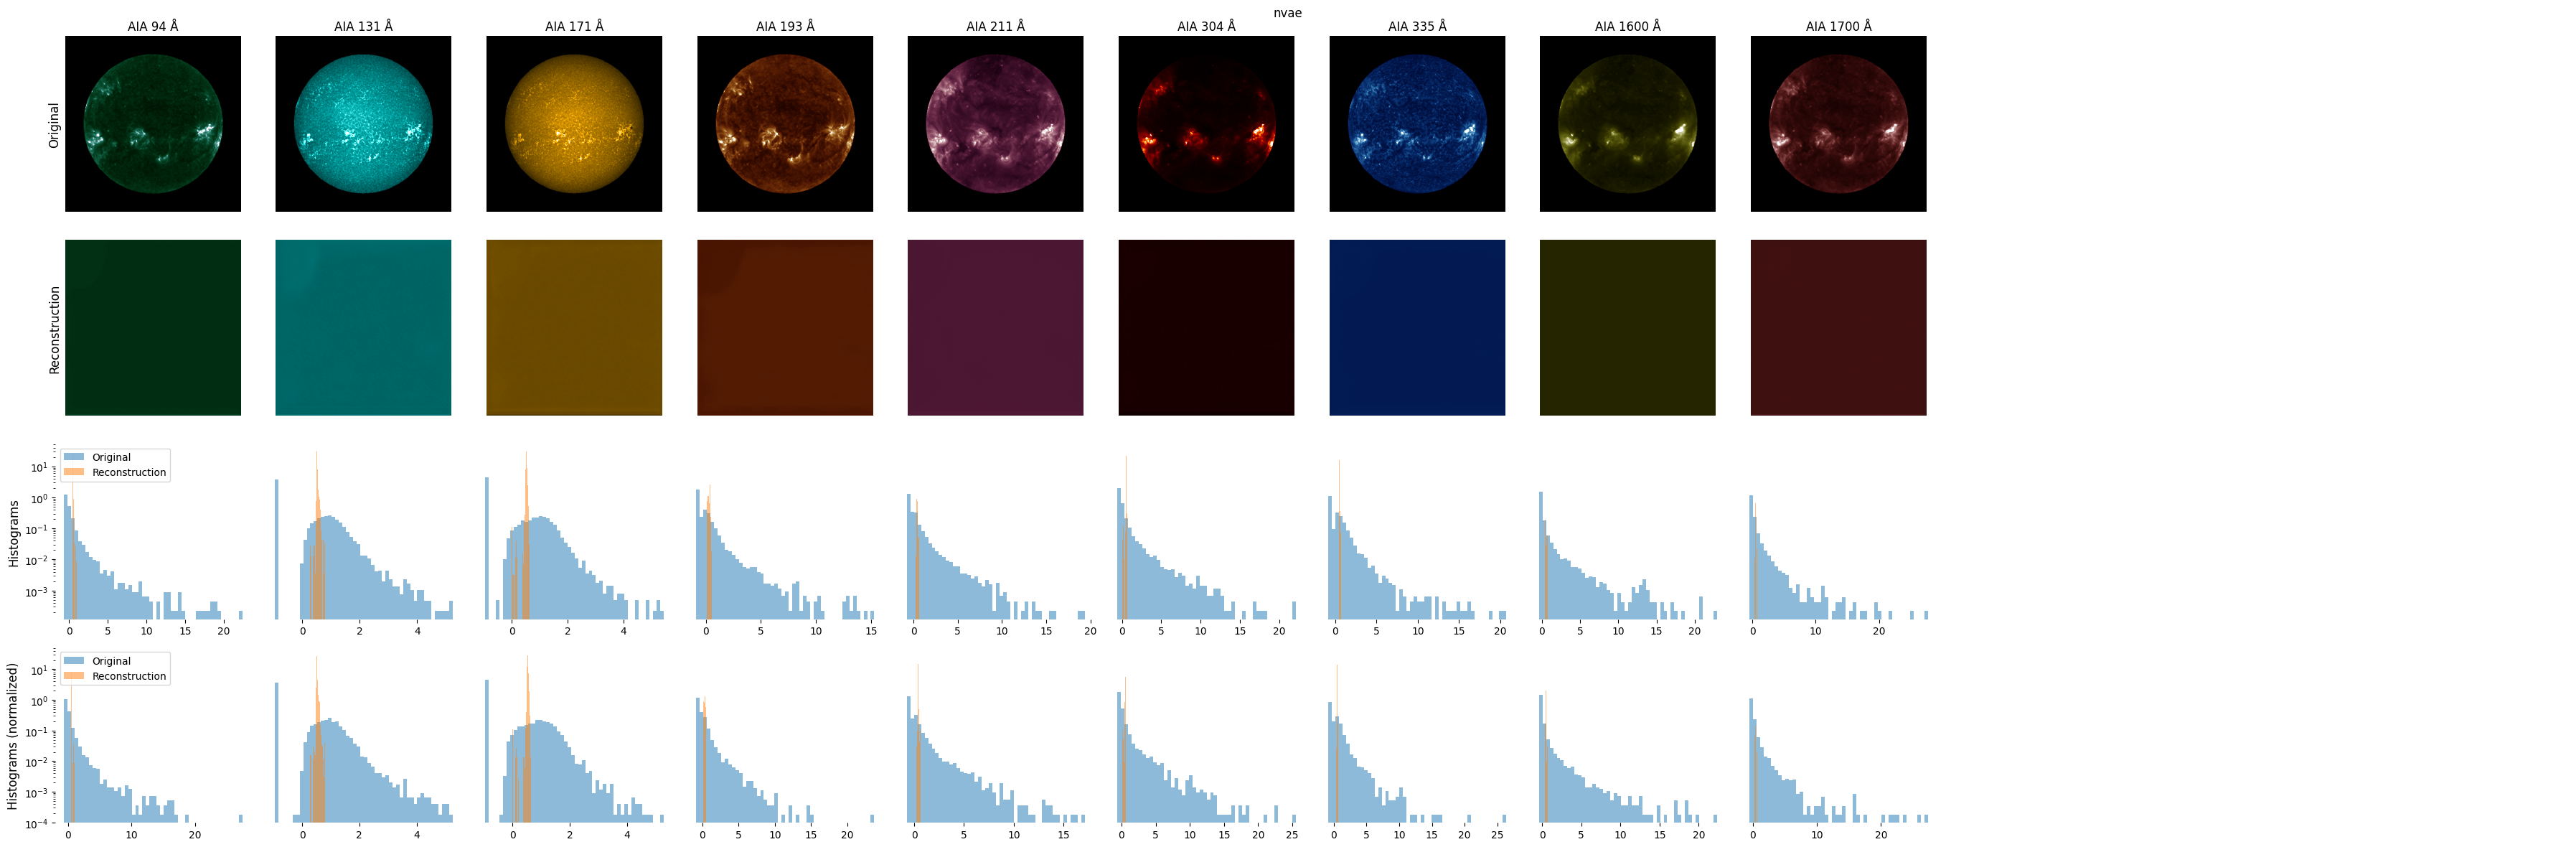

In [54]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot
import numpy as np
sdo_reconstruction_plot(
    torch.Tensor(data[0, :, :, :]),
    x[0, :, :, :],
    title="nvae",
)

(array([1.6370e+05, 9.2096e+04, 5.6760e+03, 5.4500e+02, 1.0000e+02,
        1.9000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.63633329,  0.53869414,  1.71372163,  2.88874912,  4.06377649,
         5.23880386,  6.41383123,  7.58885908,  8.76388645,  9.93891335,
        11.11394119]),
 <BarContainer object of 10 artists>)

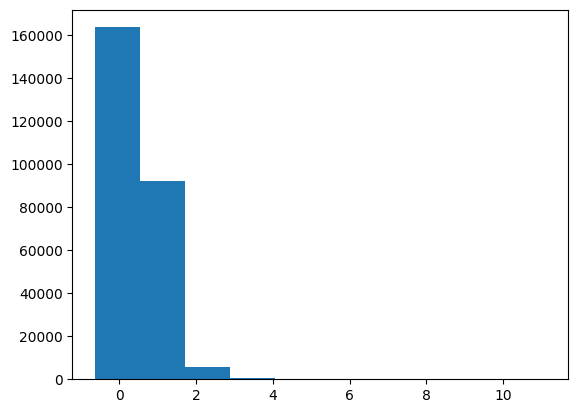

In [34]:
plt.hist(data[1, 0, :, :].reshape(-1))

In [30]:
import numpy as np

In [39]:
(data[1, 0, :, :] ** 2).max()

123.51969

/var/tmp/ipykernel_1973805/3439835910.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(data[1,0,:,:]).reshape(-1), bins=30)


(array([2.5000e+01, 0.0000e+00, 2.1000e+01, 2.7400e+02, 1.0300e+02,
        3.9000e+01, 2.8000e+01, 1.8300e+02, 8.2000e+01, 7.0000e+01,
        3.7900e+02, 4.1200e+02, 5.8400e+02, 1.2400e+03, 2.9590e+03,
        3.7920e+03, 5.9970e+03, 1.0982e+04, 1.9953e+04, 3.1456e+04,
        4.0245e+04, 3.8782e+04, 3.6531e+04, 3.4409e+04, 2.0574e+04,
        5.6010e+03, 1.1180e+03, 2.3500e+02, 2.6000e+01, 3.0000e+00]),
 array([-8.9443779 , -8.56595898, -8.1875391 , -7.80912018, -7.43070078,
        -7.05228138, -6.67386246, -6.29544306, -5.91702366, -5.53860426,
        -5.16018534, -4.78176594, -4.40334654, -4.02492714, -3.64650798,
        -3.26808882, -2.88966966, -2.51125026, -2.1328311 , -1.7544117 ,
        -1.37599242, -0.9975732 , -0.61915392, -0.24073464,  0.13768463,
         0.51610392,  0.8945232 ,  1.27294242,  1.6513617 ,  2.0297811 ,
         2.40820026]),
 <BarContainer object of 30 artists>)

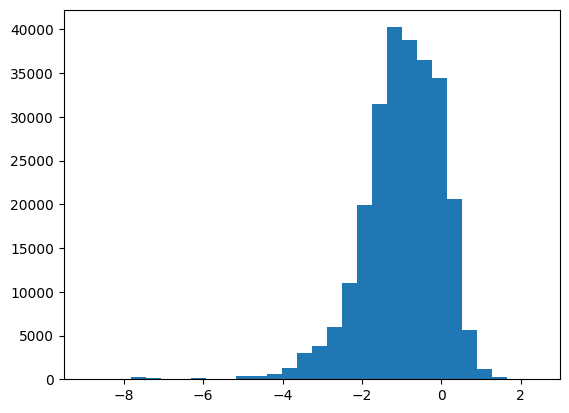

In [40]:
plt.hist(np.log(data[1, 0, :, :]).reshape(-1), bins=30)

In [21]:
data_module.normalizations

{'AIA': {'131A': {'sum': 384001740000.0,
   'max': 6183.1904,
   'std': 4.9990253,
   'skew': 56.855114,
   'kurtosis': 44441.336,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 3.252101038558539},
  '1600A': {'sum': 4231806000000.0,
   'max': 5671.4297,
   'std': 37.220505,
   'skew': 0.5736402,
   'kurtosis': 2.2550263,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 35.839058947854504},
  '1700A': {'sum': 52611726000000.0,
   'max': 29252.732,
   'std': 470.13464,
   'skew': 0.5904401,
   'kurtosis': -0.80091023,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 445.56738420005684},
  '171A': {'sum': 13046049000000.0,
   'max': 40491.76,
   'std': 126.601555,
   'skew': 3.688141,
   'kurtosis': 38.220615,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 110.48666169366297},
  '193A': {'sum': 13974062000000.0,
   'max': 54646.72,
   'std': 157.77448,
   'skew': 5.066054,
   'kurtosis': 61.212814,
   'im

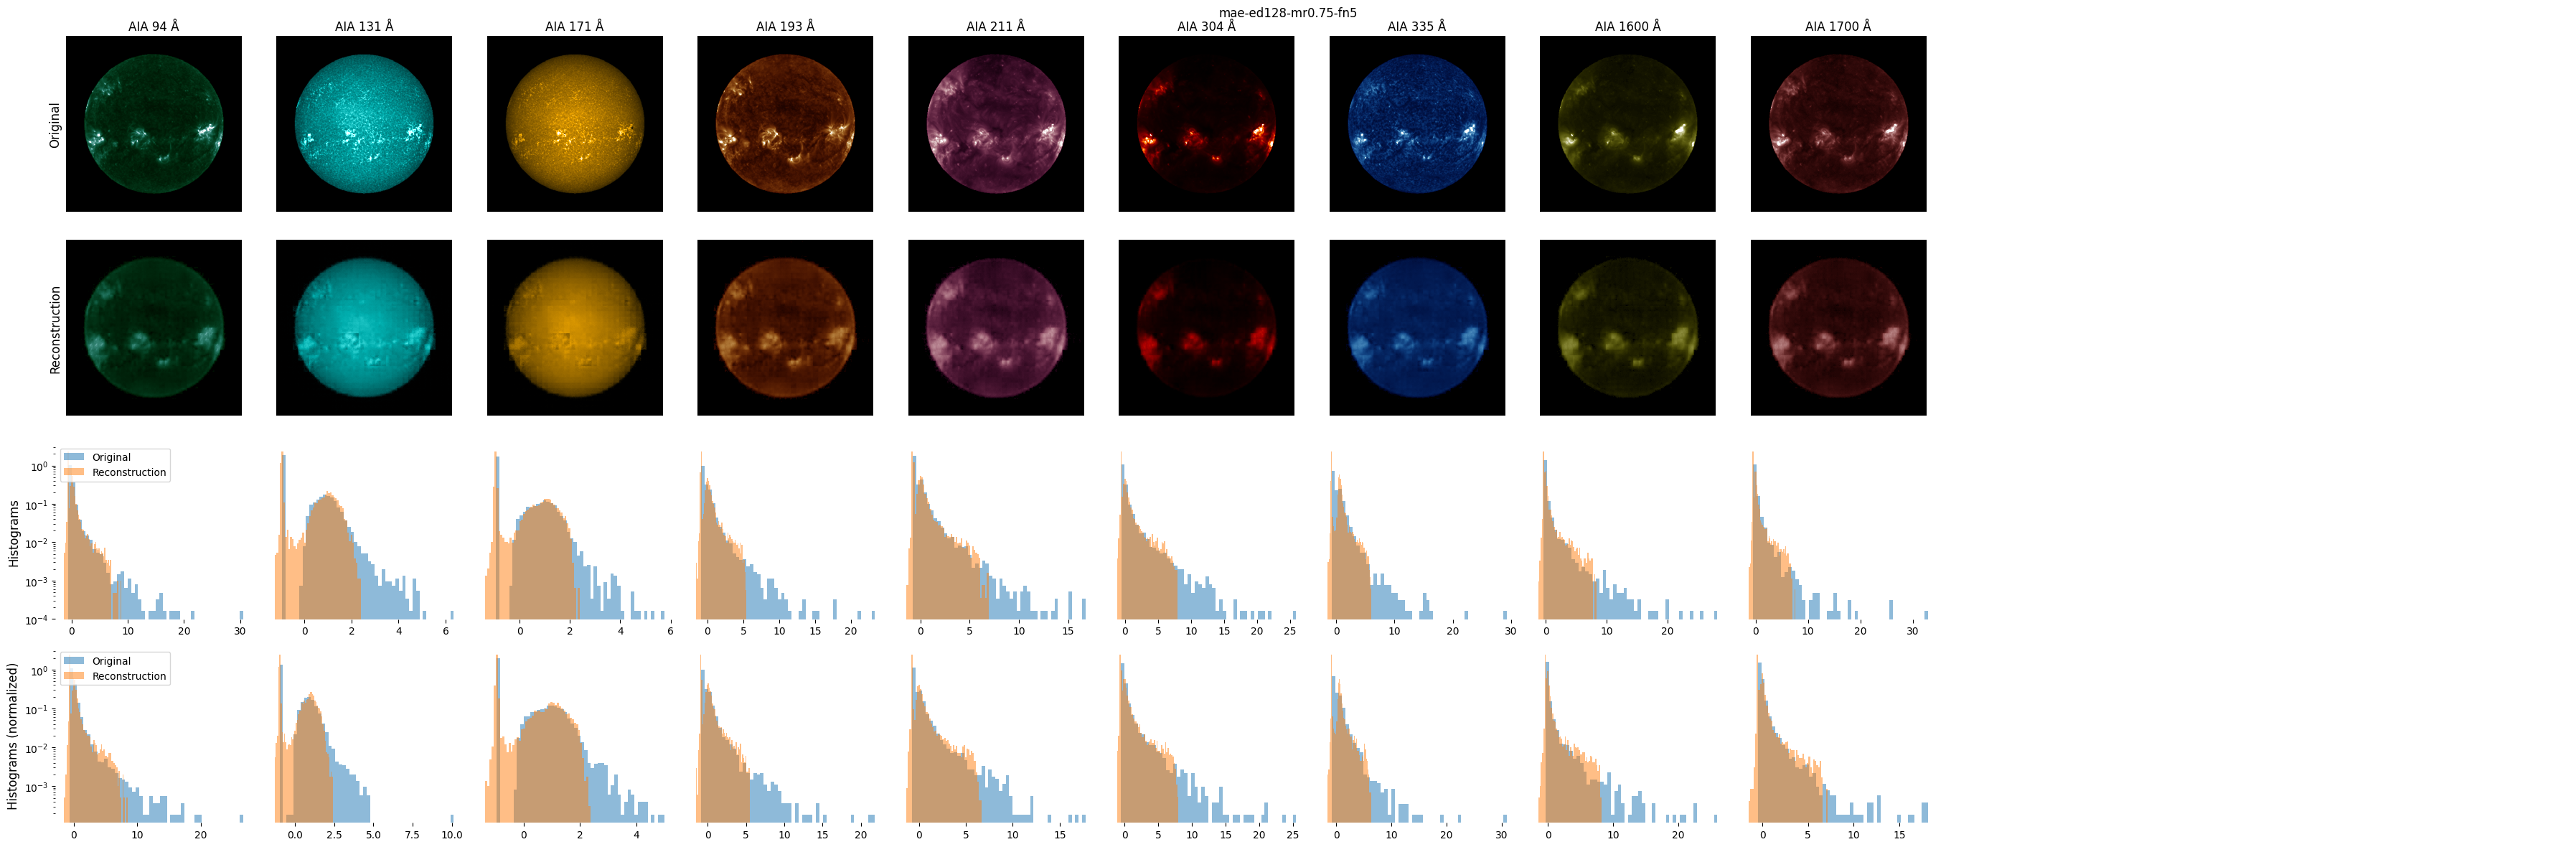

In [16]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]), x_hat[0, :, 0, :, :], title="mae-ed128-mr0.75-fn5"
)

Text(0.5, 1.0, '75% masked (yellow=mask)')

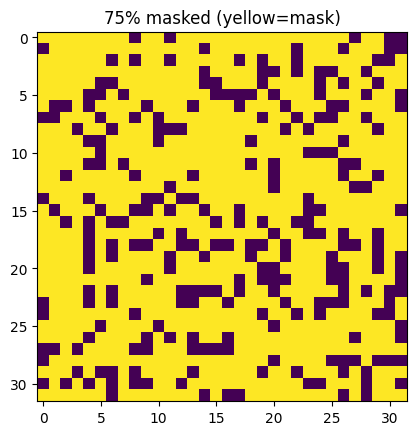

In [21]:
import matplotlib.pyplot as plt

plt.imshow(mask.reshape((32, 32, 5))[:, :, 0])
plt.title("75% masked (yellow=mask)")

In [10]:
512 / 16

32.0